# <center> Lab 1 : Statistics and Measurement </center>

#### Name :  ณัฐวัตร   สว่าง  ID:   59090500654    :   PHY 400

1. ให้เขียน python code เพื่อ อ่านค่าของข้อมูลจากการทดลองของ Cs-137, Na-22, Ba-133 โดยให้บันทึก column แรกอยู่ในชื่อ channel และ  column สอง อยู่ในชื่อ count 

In [283]:
####### data of Cs-137############
import csv
dataList = list(dict())
columnsName = ["channel", "count"]
with open("Cs137.lst", "r") as file:
    # skip header 10 times
    for _ in range(10):
        next(file)
    for line in file:
        dataArray = str(line).split()
        dataDict = {columnsName[0] : dataArray[0] , columnsName[1] : dataArray[1]  }
        dataList.append(dataDict)
try:
    with open( "Cs137.csv", "w", newline="") as csvfile:
            writer = csv.DictWriter(
                csvfile, fieldnames=columnsName, delimiter='\t')
            writer.writeheader()
            for data in  dataList:
                writer.writerow(data)
            csvfile.close()
except IOError:
            print("I/O error")
        
######## data of  Na-22 ############
import csv
dataList = list(dict())
columnsName = ["channel", "count"]
with open("Na22.lst", "r") as file:
    # skip header 10 times
    for _ in range(10):
        next(file)
    for line in file:
        dataArray = str(line).split()
        dataDict = {columnsName[0] : dataArray[0] , columnsName[1] : dataArray[1]  }
        dataList.append(dataDict)
try:
    with open( "Na22.csv", "w", newline="") as csvfile:
            writer = csv.DictWriter(
                csvfile, fieldnames=columnsName, delimiter='\t')
            writer.writeheader()
            for data in  dataList:
                writer.writerow(data)
            csvfile.close()
except IOError:
            print("I/O error")
        
########### data  of  Ba-133 ########
import csv
dataList = list(dict())
columnsName = ["channel", "count"]
with open("Ba133 (1).lst", "r") as file:
    # skip header 10 times
    for _ in range(10):
        next(file)
    for line in file:
        dataArray = str(line).split()
        dataDict = {columnsName[0] : dataArray[0] , columnsName[1] : dataArray[1]  }
        dataList.append(dataDict)
try:
    with open( "Ba133 (1).csv", "w", newline="") as csvfile:
            writer = csv.DictWriter(
                csvfile, fieldnames=columnsName, delimiter='\t')
            writer.writeheader()
            for data in  dataList:
                writer.writerow(data)
            csvfile.close()
except IOError:
            print("I/O error")


2. ใช้คำสั่ง print เพื่อแสดงค่าของ channel และ count ของ Cs-137

In [284]:
import pandas as pd
df1 = pd.read_csv("Cs137.csv", sep ="\t")
print(df1)

      channel  count
0           0      0
1           1      0
2           2      0
3           3      0
4           4      0
...       ...    ...
2043     2043      0
2044     2044      0
2045     2045      0
2046     2046      0
2047     2047      0

[2048 rows x 2 columns]


3. plot ข้อมูลที่อ่านเข้ามาของ Cs-137 โดยให้ channel เป็นแกนนอน และ count เป็นแกนตั้ง รวมถึงระบุชื่อ แกนของกราฟให้ชัดเจน

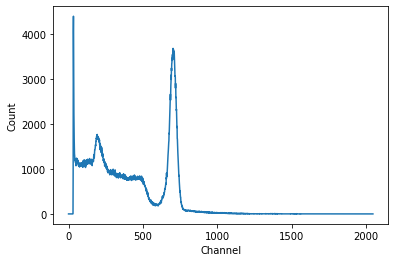

In [285]:
import matplotlib.pyplot as plt
x_data1 =df1["channel"]
y_data1 =df1["count"]
plt.plot(x_data1,y_data1)
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()



4. สถิติที่จะทำการศึกษามีลักษณะเป็น การกระจายตัวแบบปกติ เนื่องจากในข้อมูลจริงจะมีสัญญาณที่มาจากรังสีแกมมาและสัญญาณรบกวนที่มาจากเครื่องมือวัดและสิ่งเแวดล้อม โดยจะประมาณค่าสัญญาณรบกวนให้อยู่ในรูปแบบฟังก์ชันเชิงเส้น

กำหนดให้ 

ฟังก์ชันการกระจายตัวแบบปกติ 

$$
g(x) = A \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$


โดยที่ $\mu$ คือค่าเฉลี่ยของข้อมูล และ $\sigma$ คือ ส่วนเบี่ยงเบนมาตรฐานของข้อมูล

ให้เขียนฟังก์ชันสำหรับ การ fit data โดยฟังก์ชันจะประกอบด้วย การกระจายตัวแบบปกติและสัญญาณรบกวนเชิงเส้น

In [286]:
## Define  function  Gaussain  and  noise  ##
import numpy as np
from scipy.optimize import curve_fit

def gauss_function(x, A, x0, sigma,m,c):
    return  A*np.exp(-(x-x0)**2/(2*sigma**2)) + m *x+ c



5. ให้ fit ฟังก์ชันในข้อ 4 เข้ากับข้อมูลจริง ของ Cs-137 โดยกำหนดช่วงข้อมูลในการทำให้เหมาะสม เนื่องจาก การกำหนดช่วงที่กว้างเกินไปจะทำให้ฟังก์ชันคำนวณค่าได้ไม่แม่นยำ

mean = 703.451305   Channel
sigma = 22.414205  Channel


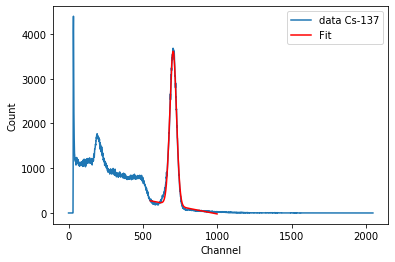

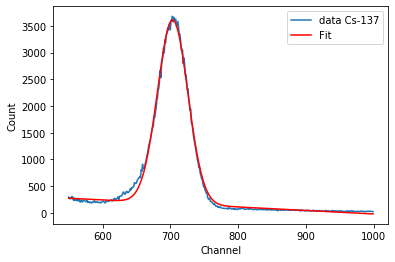

In [287]:
subx1 =x_data1[550:1000]
suby1 =y_data1[550:1000]
mean = sum(x_data1 * y_data1) / sum(y_data1)
sigma = np.sqrt(sum(y_data1 * (x_data1 - mean)**2) / sum(y_data1))
popt,pcov = curve_fit(gauss_function, subx1, suby1, p0=[max(y_data1), mean, sigma,0,0])
mean =popt[1]
sigma = popt[2]

print('mean = %8.6f   Channel'%(mean))
print('sigma = %8.6f  Channel'%(sigma))

plt.plot(x_data1, y_data1, label='data Cs-137')
plt.plot(subx1, gauss_function(subx1, *popt),'r', label= 'Fit')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.plot(subx1, suby1,label='data Cs-137')
plt.plot(subx1, gauss_function(subx1, *popt),'r', label= 'Fit')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.legend()
plt.show()


6. ค่าพลังงานเฉลี่ย และ ส่วนเบี่ยงเบนมาตรฐานของ Cs-137 จากฟังก์ชัน เป็นเท่าใด (ตอบในหน่วยของ channel)

Answer: .ค่าพลังงานเฉลี่ยของ Cs-137คือ    703.451305    channel.   ส่วนเบี่ยงเบนมาตรฐาน  22.414205   channel

7. ให้ทำตามขั้นตอนจาก ข้อ 1-5 สำหรับ ข้อมูลของ Na-22 และหาค่าของพลังงานเฉลี่ย และ ส่วนเบี่ยงเบนมาตรฐานของ Na-22 จากฟังก์ชัน โดย Na-22 จะให้พลังงานของแกมมา ออกมา 2 ค่า

ให้เขียน code แสดงวิธีหาค่าดังกล่าว โดยสามารถใช้ code ที่เขียนไปก่อนหน้าได้


7.1. ใช้คำสั่ง print เพื่อแสดงค่าของ channel และ count ของ  Na-22


In [288]:
df2 = pd.read_csv("Na22.csv", sep ="\t")
print(df2)

      channel  count
0           0      0
1           1      0
2           2      0
3           3      0
4           4      0
...       ...    ...
2043     2043      0
2044     2044      0
2045     2045      0
2046     2046      0
2047     2047      0

[2048 rows x 2 columns]


7.2. plot ข้อมูลที่อ่านเข้ามาของ Na-22 โดยให้ channel เป็นแกนนอน และ count เป็นแกนตั้ง รวมถึงระบุชื่อ แกนของกราฟให้ชัดเจน

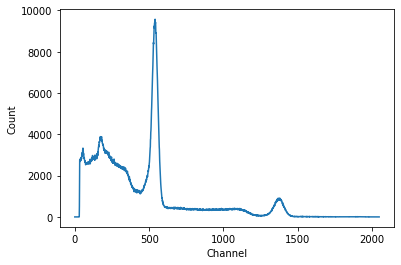

In [289]:
x_data2 =df2["channel"]
y_data2 =df2["count"]
plt.plot(x_data2,y_data2)
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

7.3. ให้เขียนฟังก์ชันสำหรับ การ fit data โดยฟังก์ชันจะประกอบด้วย การกระจายตัวแบบปกติและสัญญาณรบกวนเชิงเส้น 

In [290]:
## Define  function  Gaussain  and  noise  ##
import numpy as np
from scipy.optimize import curve_fit

def gauss_function(x, A, x0, sigma,m,c):
    return  A*np.exp(-(x-x0)**2/(2*sigma**2)) + m*x + c 



7.4. ให้ fit ฟังก์ชันในข้อ 7.3 เข้ากับข้อมูลจริง ของ Na-22 โดยกำหนดช่วงข้อมูลในการทำให้เหมาะสม เนื่องจาก การกำหนดช่วงที่กว้างเกินไปจะทำให้ฟังก์ชันคำนวณค่าได้ไม่แม่นยำ( และหาค่าของพลังงานเฉลี่ย และ ส่วนเบี่ยงเบนมาตรฐานของ Na-22 จากฟังก์ชัน โดย Na-22 จะให้พลังงานของแกมมา ออกมา 2 ค่า)

        
        

7.4.1 fit peak ที่รู้ค่าพลังงานมาตรฐานของ Na-22เป็น 511 kev(peak แรก)
        
        

mean = 538.482236   channel
sigma = 19.291778  channel


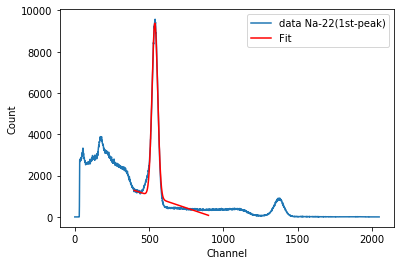

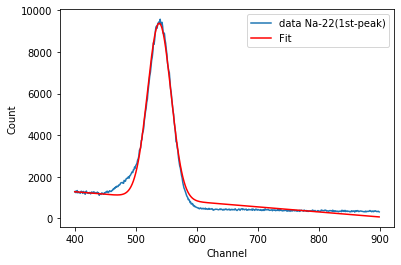

In [292]:
subx2 =x_data2[400:900]
suby2 =y_data2[400:900]
mean = sum(x_data2 * y_data2) / sum(y_data2)
sigma = np.sqrt(sum(y_data2 * (x_data2 - mean)**2) / sum(y_data2))
popt,pcov = curve_fit(gauss_function, subx2, suby2, p0=[max(y_data2), mean, sigma,0,0])

mean =  popt[1]
sigma = popt[2]

print('mean = %8.6f   channel'%(mean))
print('sigma = %8.6f  channel'%(sigma))


plt.plot(x_data2, y_data2,label='data Na-22(1st-peak)')
plt.plot(subx2, gauss_function(subx2, *popt),'r',label='Fit')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.plot(subx2, suby2,label='data Na-22(1st-peak)')
plt.plot(subx2, gauss_function(subx2, *popt),'r',label='Fit')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.legend()
plt.show()


ค่าพลังงานเฉลี่ย และ ส่วนเบี่ยงเบนมาตรฐาน(peakแรก)ของ Na-22 จากฟังก์ชัน เป็นเท่าใด (ตอบในหน่วยของ channel)


Answer: ค่าพลังงานเฉลี่ยของ Na-22 คือ   538.482236  channel.   และ   ส่วนเบี่ยงเบนมาตรฐาน  19.291778   channel

7.4.2 fit peak ที่รู้ค่าพลังงานแน่นอนของ Na-22เป็น 1275 kev(peak ที่สอง)
        
        

mean = 1372.746294   Channel
sigma = 31.611038  Channel


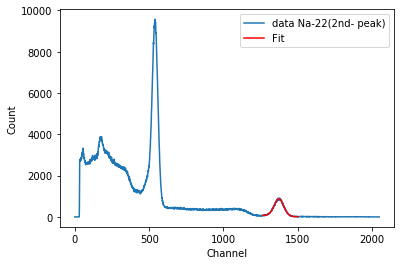

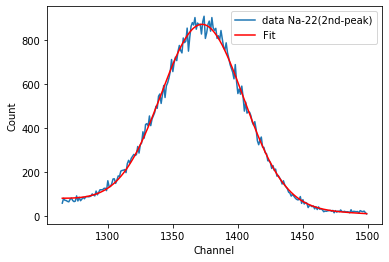

In [294]:
subx3 =x_data2[1265:1500]
suby3 =y_data2[1265:1500]
mean = sum(x_data2 * y_data2) / sum(y_data2)
sigma = np.sqrt(sum(y_data2 * (x_data2 - mean)**2) / sum(y_data2))
popt,pcov = curve_fit(gauss_function, subx3, suby3, p0=[max(y_data2), mean, sigma,0,0])

mean =popt[1]
sigma = popt[2]

print('mean = %8.6f   Channel'%(mean))
print('sigma = %8.6f  Channel'%(sigma))


plt.plot(x_data2, y_data2,label='data Na-22(2nd- peak)')
plt.plot(subx3, gauss_function(subx3, *popt),'r',label='Fit')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.plot(subx3, suby3,label='data Na-22(2nd-peak)')
plt.plot(subx3, gauss_function(subx3, *popt),'r',label='Fit')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.legend()
plt.show()



ค่าพลังงานเฉลี่ย และ ส่วนเบี่ยงเบนมาตรฐาน(peakที่สอง)ของ Na-22 จากฟังก์ชัน เป็นเท่าใด (ตอบในหน่วยของ channel)


Answer: .ค่าพลังงานเฉลี่ยของ Na-22 คือ     1372.74629   channel.   และ   ส่วนเบี่ยงเบนมาตรฐาน  31.611038   channel

8. บันทึกค่าของค่าพลังงานเฉลี่ยของ Cs-137 และ Na-22 ที่หาค่ามาได้จากการ fit data ไว้ใน array ชื่อ ECh และค่าพลังงานมาตรฐานของรังสีแกมมาจากทั้งสองธาตุนั้นจาก ฐานข้อมูล และบันทึกไว้ใน array ชื่อ Egamma  โดยเรียงจากค่าน้อยไปมาก

In [295]:
ECh = np.array([538.482236,  703.451305,  1372.74629])
Egamma = np.array([511 , 662 , 1275])

print('array of ECh')
print(ECh)
print('array of  Egamma')
print(Egamma)




array of ECh
[ 538.482236  703.451305 1372.74629 ]
array of  Egamma
[ 511  662 1275]


9. Channel เป็นหน่วยที่วัดออกมาโดยเครื่องมือวัด ยังไม่ใช่ค่าพลังงานจริงของรังสีแกมมา ที่มักจะบันทึกค่าไว้เป็นหน่วยของ keV ดังนั้นผู้ทำการทดลองจะต้อง สร้าง calibration curve เพื่อเปลียนค่าจาก พลังงานในหน่วยของ channel เป็นพลังงานในหน่วยของ keV 

ให้ใช้ข้อมูลจากข้อ 8 เพื่อหาสมการของ calibration curve โดยในการทดลองนี้ ให้ใช้ฟังก์ชันเชิงเส้น สำหรับ calibration curve

In [296]:
# fit function for Calibration curve
def  Func(x , m ,c):
    y = m*x + c
    return y
# model fitting 
popt , pcov  = curve_fit(Func,ECh,Egamma)

m = popt[0]
c =  popt[1]



10. Plot ความสัมพันธ์ระหว่าง count กับ พลังงานในหน่วย keV ของ Cs-137, Ba-133 และ Na-22

Slope = 0.91580946  kev/Ch
y-intercept(c) = 17.81715928 kev


Text(0.5, 1.0, 'Calibration curve')

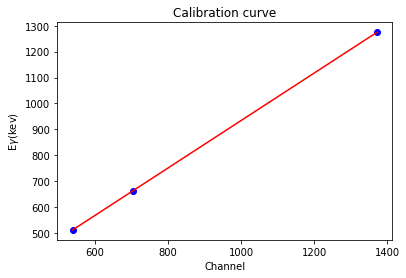

In [297]:
print('Slope = %8.8f  kev/Ch'% (m))
print('y-intercept(c) = %8.8f kev'% (c))

plt .plot(ECh,Egamma,'ob' )
plt.plot(ECh, Func(ECh, *popt),'r',label='Fit')
plt.xlabel('Channel')
plt.ylabel('E$\gamma$(kev)')
plt.title('Calibration curve')


    


จากสมการของ calibration curve ในการทดลองนี้   คือ     y = 0.91580946 x  + 17.81715928     

หรือ   E  =  0.91580946 *(Channel) + 17.81715928        


โดยจากสมการ calibration  curve      จะได้ว่า   slope  =   0.91580946   kev/channel  และ จุดตัดแกนy   C = 17.81715928   kev



****หลังจากทำการหาสมการของ calibration curve  จะทำให้เราเปลี่ยนแกน X จาก(channel) ไปเป็นพลังงานของรังสีแกมมา(E kev)  ได้  จากนั้นจึง Plot กราฟความสัมพันธ์ระหว่างค่านับวัด Count  กับ กับค่าพลังงานของรังสีแกมมา(E kev)  โดยให้ E kev เป็นแกนนอน และ count เป็นแกนตั้ง รวมถึงระบุชื่อ แกนของกราฟให้ชัดเจน   (ของ Cs-137)

Text(0.5, 1.0, 'Cs-137')

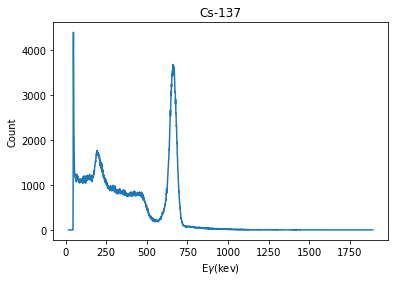

In [299]:
def  E(x):
    return   0.91580946*x + 17.81715928
channel = x_data1
count  = y_data1
Energy  = E(channel)

plt.plot(Energy,count)
plt.ylabel('Count')
plt.xlabel('E$\gamma$(kev)')
plt.title('Cs-137')



**** จากนั้นเราจะนำกราฟความสัมพันธ์ระหว่างค่านับวัด Count กับ กับค่าพลังงานของรังสีแกมมา(E kev) ของ Cs-137  มา fit ฟังก์ชันในข้อ 4 (อีกครั้ง)   เพื่อ หาค่าพลังงานเฉลี่ยจริงของรังสีแกมมา และ ส่วนเบี่ยงเบนมาตรฐาน (ตอบในหน่วยของ kev)

Energy_mean = 662.173742   kev
Energy_sigma = 20.121325  kev


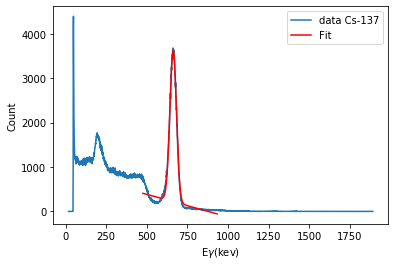

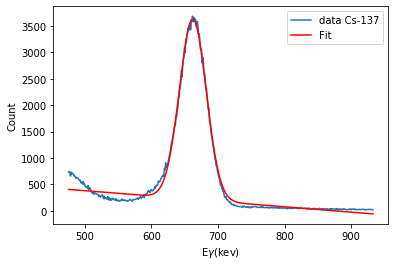

In [301]:

subx1 =Energy[500:1000]
suby1 =count[500:1000]
mean = sum(x_data1 * y_data1) / sum(y_data1)
sigma = np.sqrt(sum(y_data1 * (x_data1 - mean)**2) / sum(y_data1))
popt,pcov = curve_fit(gauss_function, subx1, suby1, p0=[max(y_data1), mean, sigma,0,0])
mean =popt[1]
sigma = popt[2]

print('Energy_mean = %8.6f   kev'%(mean))
print('Energy_sigma = %8.6f  kev'%(sigma))

plt.plot(Energy,count, label='data Cs-137')
plt.plot(subx1, gauss_function(subx1, *popt),'r', label= 'Fit')
plt.xlabel('E$\gamma$(kev)')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.plot(subx1, suby1,label='data Cs-137')
plt.plot(subx1, gauss_function(subx1, *popt),'r', label= 'Fit')
plt.xlabel('E$\gamma$(kev)')
plt.ylabel('Count')
plt.legend()
plt.show()



********จะเห็นได้ว่าค่าพลังงานเฉลี่ยจริงของรังสีแกมมา  ส่วนเบี่ยงเบนมาตรฐาน ของ Cs-137  จะมีค่าเป็น

Answer: ค่าพลังงานเฉลี่ยของ Cs-137คือ  662.173742   kev.  และ ส่วนเบี่ยงเบนมาตรฐาน คือ  20.121325  kev

*****จากนั้นเรา Plot กราฟความสัมพันธ์ระหว่างค่านับวัด Count   กับ กับค่าพลังงานของรังสีแกมมา(E kev)  โดยให้ E kev เป็นแกนนอน และ count เป็นแกนตั้ง รวมถึงระบุชื่อ แกนของกราฟให้ชัดเจน   (ของ Na-22)


Text(0.5, 1.0, 'Na-22')

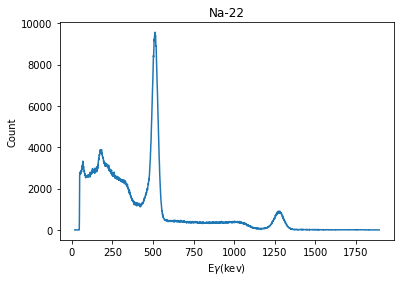

In [302]:
def  E(x):
    return   0.91580946*x + 17.81715928 
channel= x_data2
count  = y_data2
Energy  = E(channel)

plt.plot(Energy,count)
plt.ylabel('Count')
plt.xlabel('E$\gamma$(kev)')
plt.title('Na-22')


**** จากนั้นเราจะนำกราฟความสัมพันธ์ระหว่างค่านับวัด Count กับ กับค่าพลังงานของรังสีแกมมา(E kev) ของ Na-22  มา fit ฟังก์ชันในข้อ 4 (อีกครั้ง)   เพื่อ หาค่าพลังงานเฉลี่ยจริงของรังสีแกมมา และ ส่วนเบี่ยงเบนมาตรฐาน (ตอบในหน่วยของ kev)โดย Na-22 จะให้พลังงานของแกมมา ออกมา 2 ค่า

Energy_mean1 = 510.964287   kev
Energy_sigma1 = 17.667576   kev


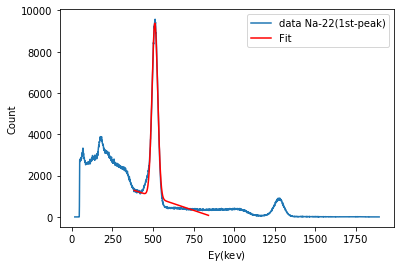

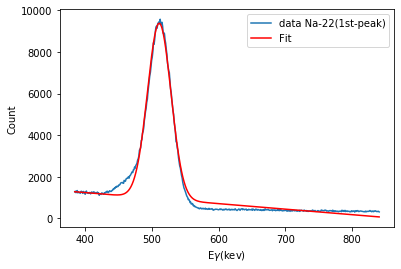

In [303]:
subx2 =Energy[400:900]
suby2 =count[400:900]
mean = sum(x_data2 * y_data2) / sum(y_data2)
sigma = np.sqrt(sum(y_data2 * (x_data2 - mean)**2) / sum(y_data2))
popt,pcov = curve_fit(gauss_function, subx2, suby2, p0=[max(y_data2), mean, sigma,0,0])

mean =  popt[1]
sigma = popt[2]

print('Energy_mean1 = %8.6f   kev'%(mean))
print('Energy_sigma1 = %8.6f   kev'%(sigma))


plt.plot(Energy,count,label='data Na-22(1st-peak)')
plt.plot(subx2, gauss_function(subx2, *popt),'r',label='Fit')
plt.xlabel('E$\gamma$(kev)')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.plot(subx2, suby2,label='data Na-22(1st-peak)')
plt.plot(subx2, gauss_function(subx2, *popt),'r',label='Fit')
plt.xlabel('E$\gamma$(kev)')
plt.ylabel('Count')
plt.legend()
plt.show()

********จะเห็นได้ว่าค่าพลังงานเฉลี่ยจริงของรังสีแกมมา  ส่วนเบี่ยงเบนมาตรฐาน ของ Na-22 (peak แรก)  จะมีค่าเป็น

Answer: ค่าพลังงานเฉลี่ยของ Na-22 (peak แรก)  คือ 510.964287  kev และ ส่วนเบี่ยงเบนมาตรฐาน(peakแรก) คือ   17.667576   kev

Energy_mean2 = 1275.123154   kev
Energy_sigma2 = 28.719155    kev


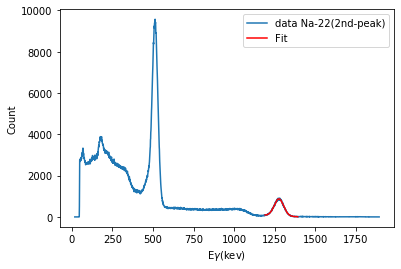

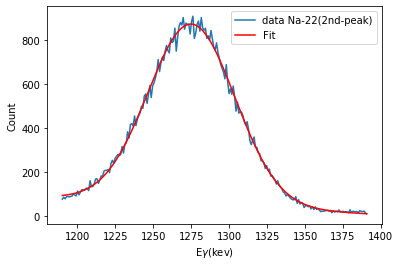

In [305]:
subx2 =Energy[1280:1500]
suby2 =count[1280:1500]
mean = sum(x_data2 * y_data2) / sum(y_data2)
sigma = np.sqrt(sum(y_data2 * (x_data2 - mean)**2) / sum(y_data2))
popt,pcov = curve_fit(gauss_function, subx2, suby2, p0=[max(y_data2), mean, sigma,0,0])

mean =  popt[1]
sigma = popt[2]

print('Energy_mean2 = %8.6f   kev'%(mean))
print('Energy_sigma2 = %8.6f    kev'%(sigma))


plt.plot(Energy,count,label='data Na-22(2nd-peak)')
plt.plot(subx2, gauss_function(subx2, *popt),'r',label='Fit')
plt.xlabel('E$\gamma$(kev)')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.plot(subx2, suby2,label='data Na-22(2nd-peak)')
plt.plot(subx2, gauss_function(subx2, *popt),'r',label='Fit')
plt.xlabel('E$\gamma$(kev)')
plt.ylabel('Count')
plt.legend()
plt.show()

********จะเห็นได้ว่าค่าพลังงานเฉลี่ยจริงของรังสีแกมมา  ส่วนเบี่ยงเบนมาตรฐาน ของ Na-22 (peak ที่สอง)  จะมีค่าเป็น

Answer: ค่าพลังงานเฉลี่ยของ Na-22 (peak ที่สอง)  คือ  1275.123154   kev และ ส่วนเบี่ยงเบนมาตรฐาน(peakที่สอง) คือ    28.719155    kev

###หลังจากนั้นจะมาทำ Data ของ Ba-133 บ้าง โดยใช้คำสั่ง print เพื่อแสดงค่าของ channel และ count ของ Ba-133  และ  plot ข้อมูลที่อ่านเข้ามาของ  Ba-133 โดยให้ channel เป็นแกนนอน และ count เป็นแกนตั้ง รวมถึงระบุชื่อ แกนของกราฟให้ชัดเจน

      channel  count
0           9      0
1          10      0
2          11      0
3          12      0
4          13      0
...       ...    ...
2034     2043      0
2035     2044      0
2036     2045      0
2037     2046      0
2038     2047      0

[2039 rows x 2 columns]


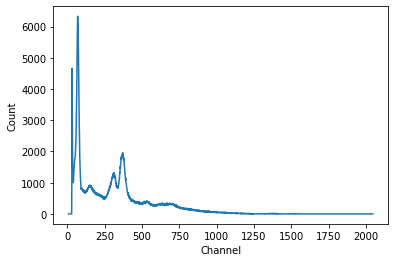

In [306]:
df3= pd.read_csv("Ba133 (1).csv", sep ="\t")
print(df3)

x_data3 =df3["channel"]
y_data3 =df3["count"]
plt.plot(x_data3,y_data3)
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

<img src= "ba133.png" />

11. จากภาพ ในการ fitdata ของ Ba-133 จะเห็นว่าจะมี peak ที่ซ้อนกันอยู่ ทำให้ ไม่สามารถใช้ ฟังก์ที่เขียนมาก่อนหน้านี้ เพื่อ fit data นี้ได้ สำหรับ Ba-133 ให้ ฟิตข้อมูล เฉพาะที่วงไว้เท่านั้น 

สำหรับ peak ที่ซ้อนกันนั้นเกิดจาก การรวมกันของ ฟังก์ชันการกระจายตัวแบบปกติ 2 ฟังก์ชัน ดังนั้น ฟังก์ชันที่จะใช้ฟิต จะอยู่ในรูป 

$f = g(x_1,\mu_1,\sigma_1)+g(x_2,\mu_2,\sigma_2)+ Noise(linear)$

ให้ เขียนฟังกัชันใหม่ สำหรับฟิตข้อมูล ในบริเวณดังกล่าว 

In [307]:
## Define  function  2 Gaussain  and  noise  ##
import numpy as np
from scipy.optimize import curve_fit

def   two_Gaussian(x, A1, x01, sigma1, A2 , x02 , sigma2, m,c ):
    return  A1*np.exp(-(x-x01)**2/(2*sigma1**2)) + A2*np.exp(-(x-x02)**2/(2*sigma2**2)) + m*x + c




12. ใช้ฟังก์ชันที่สร้างในข้อ 11 เพื่อทำการ ฟิต และหาค่า พลังงานเฉลี่ย และ ส่วนเบี่ยงเบนมาตรฐาน ของรังสีแกมมา 

mean1 = 308.738966   channel
sigma1 = 17.683739  channel
mean2 = 370.817270   channel
sigma2 = 16.964236  channel


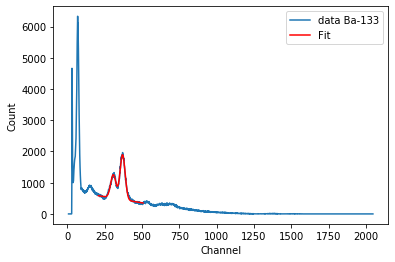

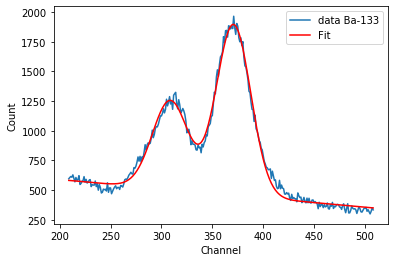

In [309]:
subx4 =x_data3[200:500]
suby4 =y_data3[200:500]

mean1 = sum(x_data3 * y_data3) / sum(y_data3)
sigma1 = np.sqrt(sum(y_data3 * (x_data3 - mean1)**2) / sum(y_data3))
mean2 = sum(x_data3 * y_data3) / sum(y_data3)
sigma2 = np.sqrt(sum(y_data3 * (x_data3 - mean2)**2) / sum(y_data3))

popt,pcov = curve_fit(two_Gaussian, subx4, suby4, p0=[1000, 200, sigma1, 2000, 500 , sigma2 ,0, 0, ])

mean1 =popt[4]
sigma1 = popt[5]
mean2 = popt[1]
sigma2 = popt[2]

print('mean1 = %8.6f   channel'%(mean1))
print('sigma1 = %8.6f  channel'%(sigma1))
print('mean2 = %8.6f   channel'%(mean2))
print('sigma2 = %8.6f  channel'%(sigma2))

plt.plot(x_data3, y_data3, label='data Ba-133')
plt.plot(subx4, two_Gaussian(subx4, *popt),'r', label= 'Fit')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.plot(subx4, suby4,label='data Ba-133')
plt.plot(subx4, two_Gaussian(subx4, *popt),'r', label= 'Fit')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.legend()
plt.show()

ค่าพลังงานเฉลี่ย และ ส่วนเบี่ยงเบนมาตรฐาน(peakแรก) และ (peakสอง) ที่ซ้อนกันอยู่ ของ Ba-133 จากฟังก์ชัน เป็นเท่าใด (ตอบในหน่วยของ channel)


Answer:  :ค่าพลังงานเฉลี่ยของBa-133 (peak แรก) คือ 308.738966  channel. และ ส่วนเบี่ยงเบนมาตรฐานของ (Peak แรก) คือ 17.683739  channel

Answer: ค่าพลังงานเฉลี่ยของBa-133 (peak สอง) คือ 370.817270  channel. และ ส่วนเบี่ยงเบนมาตรฐานของ (Peak สอง)คือ  16.964236 channel

****จากนั้นเราจะเปลี่ยนแกน X จาก(channel) ไปเป็นพลังงานของรังสีแกมมา(E kev)  ของ Ba-133 ได้  จากนั้นจึง Plot กราฟความสัมพันธ์ระหว่างค่านับวัดของ Ba-133 Count  กับ กับค่าพลังงานของรังสีแกมมา(E kev)  โดยให้ E kev เป็นแกนนอน และ count เป็นแกนตั้ง รวมถึงระบุชื่อ แกนของกราฟให้ชัดเจน   

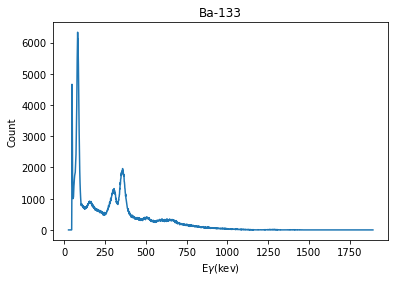

In [311]:
def  E(x):
    return   0.91580946*x + 17.81715928
channel = x_data3
count  = y_data3
Energy  = E(channel)

plt.plot(Energy,count)
plt.ylabel('Count')
plt.xlabel('E$\gamma$(kev)')
plt.title('Ba-133')
plt.show()


**** จากนั้นเราจะนำกราฟความสัมพันธ์ระหว่างค่านับวัด Count กับ กับค่าพลังงานของรังสีแกมมา(E kev) ของ Ba-133  มา fit ฟังก์ชันในข้อ 11 (อีกครั้ง)   เพื่อ หาค่าพลังงานเฉลี่ยจริงของรังสีแกมมา และ ส่วนเบี่ยงเบนมาตรฐาน (ตอบในหน่วยของ kev)โดย Ba-133 จะให้พลังงานของแกมมา ออกมา 2 ค่าที่เป็น peak ซ้อนกันอยู่

Energy_mean1 = 300.563240   kev
Energy_sigma1 = -16.194951  kev
Energy_mean2 = 357.415129   kev
Energy_sigma2 = 15.536002  kev


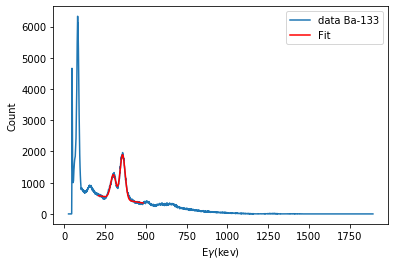

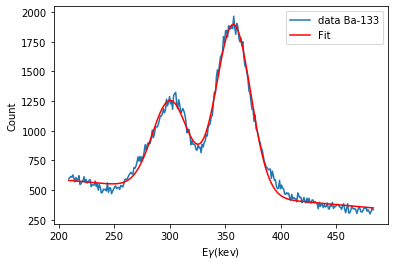

In [312]:
subx4 =Energy[200:500]
suby4 =count[200:500]

mean1 = sum(x_data3 * y_data3) / sum(y_data3)
sigma1 = np.sqrt(sum(y_data3 * (x_data3 - mean1)**2) / sum(y_data3))
mean2 = sum(x_data3 * y_data3) / sum(y_data3)
sigma2 = np.sqrt(sum(y_data3 * (x_data3 - mean2)**2) / sum(y_data3))

popt,pcov = curve_fit(two_Gaussian, subx4, suby4, p0=[1000, 200, sigma1, 2000, 500 , sigma2 ,0, 0, ])

mean1 =popt[1]
sigma1 = popt[2]
mean2 = popt[4]
sigma2 = popt[5]

print('Energy_mean1 = %8.6f   kev'%(mean1))
print('Energy_sigma1 = %8.6f  kev'%(sigma1))
print('Energy_mean2 = %8.6f   kev'%(mean2))
print('Energy_sigma2 = %8.6f  kev'%(sigma2))

plt.plot(Energy,count, label='data Ba-133')
plt.plot(subx4, two_Gaussian(subx4, *popt),'r', label= 'Fit')
plt.xlabel('E$\gamma$(kev)')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.plot(subx4, suby4,label='data Ba-133')
plt.plot(subx4, two_Gaussian(subx4, *popt),'r', label= 'Fit')
plt.xlabel('E$\gamma$(kev)')
plt.ylabel('Count')
plt.legend()
plt.show()

ค่าพลังงานเฉลี่ยจริง และ ส่วนเบี่ยงเบนมาตรฐาน(peakแรก) และ (peakสอง) ที่ซ้อนกันอยู่ ของ Ba-133 จากฟังก์ชัน เป็นเท่าใด (ตอบในหน่วยของ kev)


Answer:  ค่าพลังงานเฉลี่ยของBa-133 (peak แรก) คือ 300.563240  kev. และ ส่วนเบี่ยงเบนมาตรฐานของ (Peak แรก) คือ  16.194951  kev.

Answer: ค่าพลังงานเฉลี่ยของBa-133 (peak สอง) คือ   357.415129   kev. และ ส่วนเบี่ยงเบนมาตรฐานของ (Peak สอง)คือ   15.536002  kev.

13. วิจารณ์ผลการวิเคราห์ข้อมูลเทียบกับค่ามาตรฐาน ของทั้ง 3 ธาตุ

จากการวิเคราะห์ผลการทดลอง เราจะพบว่าเราสามารถวิเคราะห์ค่าพลังงานของรังสีแกมมา ที่มาจาก  Cs-137  ,Na-22 และ Ba-133 ได้ โดยการใช้เทคนิค data Analysis ผ่าน python code  รันบน  jupyter notebook โดย

จากการวิเคราะห์ของ Cs-137 เราจะเห็นได้ว่าค่าพลังงานของรังสีแกมมาที่เราวิเคราะห์มาได้นั้นจะมีค่าเป็น  662.173742 $\pm$ 20.121325 kev   ซึ่งจะเห็นได้ว่าถ้าเรานำไปเทียบกับค่าพลังงานของรังสีแกมมามาตรฐานของ Cs-137 คือ 662 kev จะสังเกตได้ว่าช่วงของค่าการวิเคราะห์พลังงานของรังสีแกมมาที่ได้จาก data analysis นั้นมีค่าที่ใกล้เคียงกับ ค่ามาตรฐาน โดยมีความคลาดเคลื่อนเพียง  0.026\%  ซึ่งต่อมาเราได้ทำการทดลองเพื่อวิเคราะห์หาค่าพลังงานของรังสีแกมมา จาก Na-22ซึ่งจะพบได้ว่าจะมีค่าพลังงานของรังสีแกมมามี 2 ค่าโดยค่าแรกที่ได้มาจากการวิเคราะห์จะมีค่าเป็น  510.964287 $\pm$17.667576 kev  โดยถ้านำไปเทียบกับค่าพลังงานมาตรฐานซึ่งก็คือ 511 kev จะเห็นได้ว่ามีค่าความคลาดเคลื่อนที่น้อยมากๆเพียง 0.0069\% จากนั้นเรามาวิเคราะห์พลังงานค่าที่สองของ Na-22 ซึ่งวิเคราะห์ได้ออกมาเป็น   1275.123154$\pm$28.719155 kev ซึ่งถ้านำไปเทียบกับค่าพลังงานของรังสีแกมมามาตรฐานของค่าpeakที่ 2 ซึ่งก็คือ 1275 kev  โดยจะมีความคลาดเคลื่อนเพียง 0.0096\% จะเห็นได้ว่าค่าพลังงานของรังสีแกมมาที่วัดได้มีความคลาดเคลื่อนไม่มากซึ่งอาจเป็นผลมาจากการกำหนดช่วงในการ fit function ของ ข้อมูลที่ดี จึงทำให้มีความคลาดเคลื่อนค่อนข้างน้อย ซึ่งทำให้เราเชื่อถือผลการวิเคราะห์ได้ จากนั้นเราทำการวิเคราะห์ค่าพลังงานของรังสีแกมมาของ Ba-133 ซึ่งจะปรากฏ Peak ของพลังงาน 2 peak ที่มีลักษณะซ้อนทับกันอยู่ โดยเราก็จะนำผลจากการทำ calibration cruve จากของ Cs-137 และ Na-22 มาหาค่าพลังงานของรังสีแกมมาของ Ba-133 โดยเราวิเคราะห์ค่าค่าพลังงานในแต่ละ Peak ได้เป็น 300.563240 $\pm$16.194951  kev ของpeakแรก และ 357.415129$\pm$15.536002  kev ของ peak ที่สอง ซึ่งถ้าเรานำค่าพลังงานของรังสีแกมมาของ Ba-133 มาเทียบกับค่าพลังงานมาตรฐานในจุดที่เราวิเคราะห์เราจะพบว่า peakแรกจะมีค่าพลังงานมาตรฐานเป็น 302 kev และ peakที่สอง จะมีค่าพลังงานมาตรฐานเป็น 356 kev  โดยจะเห็นได้ว่าจะมีความคลาดเคลื่อนถึง 0.47\% และ 0.39\% ตามลำดับ ซึ่งมีค่าทีใกล้เคียงกับค่ามาตรฐานเพราะ คลาดเคลื่อนเล็กน้อย แต่ว่าถ้าเราดูที่ เปอร์เซน ความคลาดเคลื่อนของ Ba-133 เทียบกับ Cs-137 และ Na-22 จะเห็นได้ว่า Ba-133 มีความคลาดเคลื่อนมากกว่า Cs-137 และ Na-22  เหตุผลที่ Ba-133มีความคลาดเคลื่อนมากกว่าอาจจะมาจากการทำ Energy calibration curve ของ Cs-137 และ Na-22  เราไม่ได้คิดผลของช่วงความคลาดเคลื่อนหรือ  error bar ซึ่งอาจจะทำให้เกิดความคลาดเคลื่อนเล็กน้อยที่จุดนี้ได้



14. สรุปผลการวิเคราะห์

จากการทดลองเราได้ทำ data Analysis ของ ข้อมูลการวัดรังสีแกมมาของ Cs-137, Na-22 และBa-133 เราจะเห็นได้ว่าในการวิเคราะห์data หรือข้อมูลที่มีปริมาณมากๆหรือมหาศาล เราต้องเข้าใจถึงกระบวนการเชิงสถิติของข้อมูลๆนั้น model ที่ใช้ในการอธิบายแนวโน้มทางสถิติของข้อมูลนั้นๆ ซึ่งจะทำให้เราเข้าใจธรรมชาติของข้อมูล นั้นๆมากขึ้นเช่น ในการการทดลองนี้เราทำเกี่ยวกับข้อมูลที่ได้มาจากการวัดรังสีแกมมาของธาตุต่างๆ ซึ่งในการวิเคราะห์ที่เราทำมาใน แลปนี้จะเห็นได้ว่า เราสามารถเห็นธรรมชาติ ของธาตุต่างๆในการปลดปล่อยรังสีแกมมาในแต่ละค่าพลังงานนั้นๆออกมา จากข้อมูล หรือ data ที่เราวิเคราะห์มา ซึ่ง ในแต่ละธาตุก็จะมีคุณลักษณะเฉพาะในการปลดปล่อยรังสีแกมมาในช่วงพลังงานที่แตกต่างกันออกไป เราจะเห็นได้ว่าในการวิเคราะห์ข้อมูลที่มีปริมาณเยอะๆถ้าเรารู้วิธีในการจัดการกับข้อมูล เราจะสามารถ เห็นแนวโน้มของธรรมชาติต่างๆ ที่ออกมาจากเชิงสถิติของข้อมูลนั้นๆได้